# MACHINE LEARNING ASSIGNMENT 2
## CLASSIFICATION OF TIME SERIES 
## CLASSIFY HUMAN ACTIVITIES BASED ON TIME BY DATA OBTAINED BY A WIRELESS ACTIVITIES

##  A. DATA OBTAINED FROM : 
https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 

The dataset contains 7 folders that represent seven types of activities. In
each folder, there are multiple files each of which represents an instant of a human
performing an activity. Each file containis 6 time series collected from activities
of the same person. There are 88 instances in the dataset, each of which contains
6 time series and each time series has 480 consecutive values.


# B

Respective data sets were renamed/reorganized to appropriate training and testing datasets

# C: FEATURE EXTRACTION
# i
## Features to be used
1. Means
2. Standard Deviations
3. Skewness and Kurtosis
4. Maximum and Minimum Values
5. Cross-Correlation and Auto-Corelations
6. Orders
7. Parameters of the AR and MR part
8. K- peaks
9. k - quantiles


# ii

Extracting time-domain features for all 6 time series in each instance

In [14]:
import glob
import pandas as pd
import os
import numpy as np
import sklearn

In [15]:
def loading(location,name,frame1,frame2):
    path = location
    allFiles = glob.glob(path + "/*.csv")
    full_test_df  = pd.DataFrame()
    full_train_df = pd.DataFrame()
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=4,error_bad_lines=False)
        df = df.drop(df.columns[0],axis = 1) 
        if (name == "bending1" or name == "bending2"):
            if (("dataset1" or "dataset2") not in file_) :
                full_train_df = df
                if name == "bending1":
                    full_train_df["target"] = name
                else:
                    full_train_df["target"] = name
        elif ((name != "bending1" and name != "bending2") and (("dataset1" or "dataset2" or "dataset3") not in file_)):
            full_train_df = df
            full_train_df["target"] = name
        else:
            full_test_df = df
            full_test_df["target"] = name
        
        
    frame1 = pd.concat([frame1, full_train_df], ignore_index=True)
    frame2 = pd.concat([frame2, full_test_df], ignore_index=True)
        
    return (frame1,frame2)

In [95]:
def importing(location,name,new_dataframe,holding,test_df,train_df):
    path = location
    allFiles = glob.glob(path + "/*.csv")
    frame = pd.DataFrame()
    list_ = [] 
    mini =[]
    maxi = []
    meani = []
    global counter
    global holder
    global test_counterb
    global test_countero
    global x
    global y
    #global test_df
    #test_df = pd.DataFrame()
    test_counterb =1
    test_countero = 1
    holder = "bending1"
    
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=4,error_bad_lines=False)
        #print(file_)
        df = df.drop(df.columns[0],axis = 1)         
        meani = list( df.mean())
        mini = list(df.quantile(.25))
        maxi = list(df.quantile(.75))
        min_val = list( df.min())
        max_val = list(df.max())
        median_val = list(df.median())
        new_dataframe.loc[counter,['target']] = name
        new_dataframe.loc[counter,['avg_rss12_mean','var_rss12_mean','avg_rss13_mean','var_rss13_mean','avg_rss23_mean','var_rss23_mean']] = meani
        new_dataframe.loc[counter,['avg_rss12_minimum','var_rss12_minimum','avg_rss13_minimum','var_rss13_minimum','avg_rss23_minimum','var_rss23_minimum']] = mini
        new_dataframe.loc[counter,['avg_rss12_maximum','var_rss12_maximum','avg_rss13_maximum','var_rss13_maximum','avg_rss23_maximum','var_rss23_maximum']] = maxi
        new_dataframe.loc[counter,["avg_rss12_min_value","var_rss12_min_value","avg_rss13_min_value","var_rss13_min_value","avg_rss23_min_value","var_rss23_min_value"]] = min_val
        new_dataframe.loc[counter,['avg_rss12_max_value','var_rss12_max_value','avg_rss13_max_value','var_rss13_max_value','avg_rss23_max_value','var_rss23_max_value']] = max_val
        new_dataframe.loc[counter,['avg_rss12_median','var_rss12_median','avg_rss13_median','var_rss13_median','avg_rss23_median','var_rss23_median']] =median_val
        holding = new_dataframe.loc[counter].copy()
        if holder != name:
            test_counterb = 1
            test_countero = 1
            holder = name
        
        if (name == "bending1" or name =="bending2") and test_counterb <= 2 :
            test_df.loc[x]=(holding)
            x=x+1
            test_counterb = test_counterb + 1
            
        elif name != "bending1" and name !="bending2" and test_countero <= 3 :
            test_df.loc[x]=(holding)
            x=x+1
            test_countero = test_countero + 1
            
        else:
            train_df.loc[y] = (holding)
            y = y+1
            catcher = 1

            
        
        new_dataframe.append(new_dataframe)
        counter = counter + 1
        list_.append(df)
        frame = pd.concat(list_)

    return (test_df,train_df,new_dataframe,frame)


activities = ['bending1', 'bending2','cycling','lying','sitting','standing','walking']
temp_predictors = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
predictors = ['_minimum','_maximum','_mean']
half_path = r'C:\Users\anmol\OneDrive\Desktop\Viterbi\Machine Learning\MLHW2\AREM'
new_dataframe = pd.DataFrame()
holder1_df = pd.DataFrame()
holder2_df = pd.DataFrame()
holder3_df = pd.DataFrame()
holding = pd.DataFrame()
test_df = pd.DataFrame()
train_df = pd.DataFrame()
mega_df = pd.DataFrame()
frame1 = pd.DataFrame()
frame2 = pd.DataFrame()
counter = 0
x = 0
y = 0
for pred in temp_predictors:
    for f in predictors:
        word = pred + f
        new_dataframe[word] = []
        holder1_df[word] = []
        holder2_df[word] = []
        holder3_df[word] = []
        test_df[word] =[]
        train_df[word] = []
        holding[word] = []
        frame1[pred]=[]
        frame2[pred] = []
test_df["target"] =[]
holding ["target"] =[]
new_dataframe["target"] = []
train_df["target"] = []
holder1_df["target"] =[]
holder2_df["target"] =[]
holder3_df["target"] =[]
frame1["target"] = []
frame2["target"] =[]


temp_predictors = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
predictors = ['_minimum','_maximum','_mean','_min_value','_max_value','_median']
new_dataframe = pd.DataFrame()
holding = pd.DataFrame()
test_df = pd.DataFrame()
train_df = pd.DataFrame()
counter = 0
x = 0
y = 0
for pred in temp_predictors:
    for f in predictors:
        word = pred + f
        new_dataframe[word] = []
        test_df[word] =[]
        train_df[word] = []
        holding[word] = []
test_df["target"] =[]
holding ["target"] =[]
new_dataframe["target"] = []
train_df["target"] = []


for i in activities:
    full_path = os.path.join(half_path,i)
    name = i
    df = importing(full_path,name,new_dataframe,holding,test_df,train_df)
test_df = df[0]
train_df = df[1]
full_df = df[2]
mega_df = df[3]
#print("Test Data")
#print(test_df[:5])
#print("Train Data")
#print(train_df[:5])
print("Complete Data")
print(full_df[:10])

Complete Data
   avg_rss12_minimum  avg_rss12_maximum  avg_rss12_mean  avg_rss12_min_value  \
0            39.2500              42.00       40.624792                37.25   
1            42.0000              43.67       42.812812                38.00   
2            43.0000              45.00       43.954500                35.00   
3            39.1500              45.00       42.179813                33.00   
4            41.3300              42.75       41.678063                33.00   
5            42.5000              45.00       43.454958                37.00   
6            43.3100              44.67       43.969125                36.25   
7            23.1875              26.50       24.562958                12.75   
8            25.5000              30.00       27.464604                 0.00   
9            26.1875              34.50       32.586208                21.00   

   avg_rss12_max_value  avg_rss12_median  var_rss12_minimum  \
0                45.00             40.50  

In the above code the following features were extracted for each time series.

1. minimum  = .25 quantile
2. maximum = .75 quantile
3. median = median of all
4. mean = mean of all values
5. min_value = minimum value in range
6. max_value = maximum value in range

hence total number of columns would be 6 (time series) * 6 (feature i.e min,max,median,mean,.25 quantile,.75 quantile) + labels = 37 columns and 88 rows. 



# Not only were the six time series extracted but also some usefull  time series feature operation were done on them in the above block.

# iii STD of each feature and bootstrap confidence interval of STD

In [196]:
import scipy
import scikits.bootstrap as bs
from scipy import stats

full_df = full_df.dropna()

for i in range(0,36):
    print ("Standard deviation for the feature",i+1,"=",full_df.iloc[:,i].std() ) 
    CIs = bs.ci(data=full_df.iloc[:,i],statfunction=scipy.std, n_samples = 20000)
    print ("Bootstrapped 95% confidence intervals\nLow:", CIs[0], "\nHigh:", CIs[1] ) 
    
  

Standard deviation for the feature 1 = 6.1805920862125685
Bootstrapped 95% confidence intervals
Low: 5.581199671287127 
High: 6.867401281658447
Standard deviation for the feature 2 = 5.168162622092964
Bootstrapped 95% confidence intervals
Low: 4.358799427950105 
High: 6.192353513002204
Standard deviation for the feature 3 = 5.363195645045545
Bootstrapped 95% confidence intervals
Low: 4.725370852988097 
High: 6.155246993680083
Standard deviation for the feature 4 = 9.62444230081467
Bootstrapped 95% confidence intervals
Low: 8.385557712383104 
High: 11.561613632617751
Standard deviation for the feature 5 = 4.418978283771094
Bootstrapped 95% confidence intervals
Low: 3.375903537251324 
High: 5.753641883770191
Standard deviation for the feature 6 = 5.46472496216009
Bootstrapped 95% confidence intervals
Low: 4.802961577277317 
High: 6.267631268999313
Standard deviation for the feature 7 = 0.9502981381598107
Bootstrapped 95% confidence intervals
Low: 0.8191743381685684 
High: 1.0623826818103

C:\Users\anmol\newpython\envs\ulti\lib\site-packages\ipykernel_launcher.py:9: InstabilityWarning: BCa acceleration values for indexes (array([0], dtype=int64),) were undefined. Statistic values were likely all equal. Affected CI will be inaccurate.
  if __name__ == '__main__':
C:\Users\anmol\newpython\envs\ulti\lib\site-packages\ipykernel_launcher.py:9: InstabilityWarning: Some values were NaN; results are probably unstable (all values were probably equal)
  if __name__ == '__main__':


Bootstrapped 95% confidence intervals
Low: 0.0 
High: 0.0
Standard deviation for the feature 11 = 5.068951729756293
Bootstrapped 95% confidence intervals
Low: 4.589019622596764 
High: 5.535349202298434
Standard deviation for the feature 12 = 1.418979779751456
Bootstrapped 95% confidence intervals
Low: 1.2212139462208007 
High: 1.5823241730478117
Standard deviation for the feature 13 = 4.2440299129992605
Bootstrapped 95% confidence intervals
Low: 3.6265396161440204 
High: 4.886752446818134
Standard deviation for the feature 14 = 4.195438179177879
Bootstrapped 95% confidence intervals
Low: 3.5413574265217522 
High: 4.89671308520753
Standard deviation for the feature 15 = 4.0309098988041425
Bootstrapped 95% confidence intervals
Low: 3.3908843999474705 
High: 4.672165568439396
Standard deviation for the feature 16 = 2.9545164118707987
Bootstrapped 95% confidence intervals
Low: 2.7464206422722492 
High: 3.15703892198392
Standard deviation for the feature 17 = 4.89888695768928
Bootstrapped 9

C:\Users\anmol\newpython\envs\ulti\lib\site-packages\ipykernel_launcher.py:9: InstabilityWarning: BCa acceleration values for indexes (array([0], dtype=int64),) were undefined. Statistic values were likely all equal. Affected CI will be inaccurate.
  if __name__ == '__main__':
C:\Users\anmol\newpython\envs\ulti\lib\site-packages\ipykernel_launcher.py:9: InstabilityWarning: Some values were NaN; results are probably unstable (all values were probably equal)
  if __name__ == '__main__':


Bootstrapped 95% confidence intervals
Low: 0.0 
High: 0.0
Standard deviation for the feature 23 = 2.182822878229595
Bootstrapped 95% confidence intervals
Low: 1.9662141535201534 
High: 2.427871315110725
Standard deviation for the feature 24 = 1.1450173544744118
Bootstrapped 95% confidence intervals
Low: 1.0322019524572823 
High: 1.209032423132219
Standard deviation for the feature 25 = 6.130487045201819
Bootstrapped 95% confidence intervals
Low: 4.848661177244586 
High: 7.769975887498669
Standard deviation for the feature 26 = 5.56373643770285
Bootstrapped 95% confidence intervals
Low: 4.389157576092612 
High: 7.001493769449005
Standard deviation for the feature 27 = 5.707933852243464
Bootstrapped 95% confidence intervals
Low: 4.43529835956078 
High: 7.203714209910043
Standard deviation for the feature 28 = 6.138588864099675
Bootstrapped 95% confidence intervals
Low: 4.47491449863737 
High: 8.236685737650259
Standard deviation for the feature 29 = 5.772746079656295
Bootstrapped 95% con

# iv Feature selection

After extracting features in c - ii and then then processing them by using some of the selected features it was noted that most appropriate features for all 6 time series features would be :using 25%, 75% quantile and mean. Not using min because of skewness of data towards 0 (i.e) Left skewed and by using these features we were able to avoid normalization of data as this itself gave evenly spaced/distrbuted data.

# D Binary Classification using Logistic Regression

# i

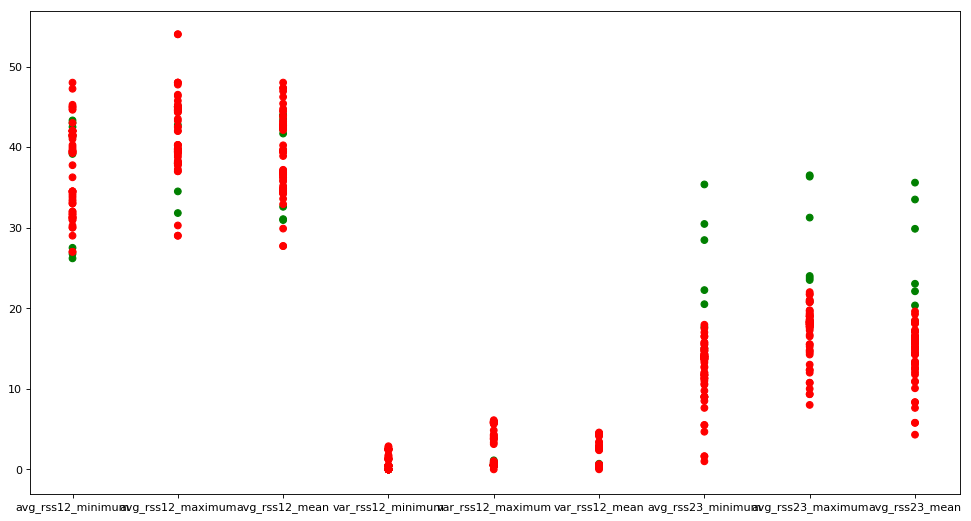

In [181]:
import matplotlib.pyplot as plt

ulti_df = pd.DataFrame()
temp_ulti_df = pd.DataFrame()
ulti_df = train_df
ulti_df = ulti_df.replace(['bending1', 'bending2','cycling', 'lying', 'sitting', 'standing','walking'],['bending', 'bending', 'notbending', 'notbending', 'notbending', 'notbending','notbending'])
heads = [0,1,2,6,7,8,24,25,26,36]
temp_ulti_df = ulti_df.iloc[:,heads]
temp_ulti_df = temp_ulti_df.dropna()
temp_ulti_df = temp_ulti_df.replace(['bending', 'notbending'],[1,0])
temp_ulti_df_target = temp_ulti_df['target']
temp_ulti_df = temp_ulti_df.drop(columns = ['target'])
#x_labels = list(temp_ulti_df.columns.values)
#x_labels.pop(9)
#print(x_labels)
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

color = temp_ulti_df_target.replace([1,0],["g","r"]) 

for column in temp_ulti_df.columns:
    x_label = []
    y_label = []
    for i in range(0,len(temp_ulti_df[column])):
        x_label.append(column)
    y_label = temp_ulti_df[column]
    plt.scatter(x= x_label ,y= y_label,c = color)
plt.show()     
        


# ii

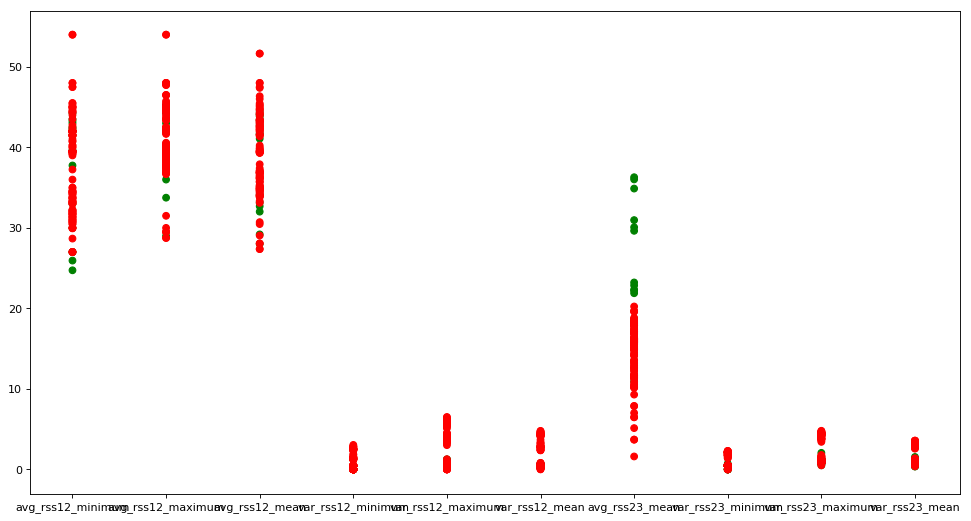

In [195]:
ulti_df1 = pd.DataFrame()
temp_ulti_df1 = pd.DataFrame()
ulti_df1 = b[1]
ulti_df1 = ulti_df1.replace(['bending1', 'bending2','cycling', 'lying', 'sitting', 'standing','walking'],['bending', 'bending', 'notbending', 'notbending', 'notbending', 'notbending','notbending'])
heads1 = [0,1,2,3,4,5,14,15,16,17,18]
temp_ulti_df1 = ulti_df1.iloc[:,heads1]
temp_ulti_df1 = temp_ulti_df1.dropna()

temp_ulti_df1 = temp_ulti_df1.replace(["bending","notbending"],[1,0])

temp_ulti_df1_target = temp_ulti_df1['target']
temp_ulti_df1 = temp_ulti_df1.drop(columns = ['target'])

plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

color1 = temp_ulti_df1_target.replace([1,0],["g","r"]) 

for column in temp_ulti_df1.columns:
    x_label1 = []
    y_label1 = []
    for i in range(0,len(temp_ulti_df1[column])):
        x_label1.append(column)
    y_label1 = temp_ulti_df1[column]
    plt.scatter(x= x_label1 ,y= y_label1,c = color1)
plt.show()     
        


The classes seem to be less seperated, it seems as the number of data points increase the data seems to be even less sperated, which would make classification even more difficult

# Running a test just to see where we currently stand in terms of base rate accuracy wihtout any manipulations

In [20]:
firsthalf_train = blr_train[:34]
firsthalf_train_target = train_target[:34]
secondhalf_train = blr_train[34:]
secondhalf_train_target = train_target[34:]

#Lets try to beat that score
model1 = LogisticRegression(penalty = 'l2', C=1)
secondanswer = model1.fit(firsthalf_train,firsthalf_train_target)
new_answer = secondanswer.predict(secondhalf_train)

print("Logistic regression 1-d-i accuracy is %2.2f" % accuracy_score(test_target,model.predict(blr_test)))

print("Divided model 1-d-ii  accuracy is %2.2f" % accuracy_score(secondhalf_train_target,new_answer))

#now lets plot it

Logistic regression 1-d-i accuracy is 0.79
Divided model 1-d-ii  accuracy is 0.85


C:\Users\anmol\newpython\envs\ulti\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# iii

In [ ]:
training_data=pd.DataFrame()
testing_data=pd.DataFrame()

In [ ]:
test = pd.DataFrame()
train= pd.DataFrame()

for name in activities:
    path = os.path.join(half_path,name)
    allFiles = glob.glob(path + "/*.csv")
    #print(name)
    for file_ in allFiles:
        full_test_df  = pd.DataFrame()
        full_train_df = pd.DataFrame()
        df = pd.read_csv(file_,index_col=None, header=4)
        df = df.drop(df.columns[0],axis = 1) 
        if ((name == "bending1") or (name == "bending2")) :
            if (("dataset1" in file_) or ("dataset2" in file_)):
                full_test_df = df
                full_test_df["target"] = name 
            else:
                full_train_df = df
                full_train_df["target"] = name   
                
        elif ((name != "bending1") or (name != "bending2")):
            if (("dataset3"  in file_) or ("dataset1"  in file_) or ("dataset2"  in file_)):
                full_test_df = df
                full_test_df["target"] = name
            else:
                full_train_df = df
                full_train_df["target"] = name
               
            
        train = train.append(full_train_df)
        test = test.append(full_test_df)
       
    
print(train[:10])
print('\n')
print(test[:10])    
    

In [23]:
def splitDataFrameIntoSmaller(df, chunkSize): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
        
    return listOfDf

btrain = train
btest = test
btrain = btrain.replace(['bending1', 'bending2','cycling', 'lying', 'sitting', 'standing',
       'walking'],['bending', 'bending', 'notbending', 'notbending', 'notbending', 'notbending',
       'notbending'])

btest=btest.replace(['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing',
       'walking'],['bending', 'bending', 'notbending', 'notbending', 'notbending', 'notbending',
       'notbending'])
b = []
for t in range(1,11):
    a = [] 
    a = splitDataFrameIntoSmaller(btrain, (int(480/t)) )
    feature = pd.DataFrame()
    counterss = 0
    for z in range(0,(len(a)-1)):
        holder1_df = holder1_df[0:0]
        holder1_df.loc[counterss,['target']] = a[z].iloc[0,6] 
        a[z] = a[z].drop(columns = ['target'])
        holder1_df.loc[counterss,['avg_rss12_mean','var_rss12_mean','avg_rss13_mean','var_rss13_mean','avg_rss23_mean','var_rss23_mean']] = list(a[z].mean())
        holder1_df.loc[counterss,['avg_rss12_minimum','var_rss12_minimum','avg_rss13_minimum','var_rss13_minimum','avg_rss23_minimum','var_rss23_minimum']] = list(a[z].quantile(.25))
        holder1_df.loc[counterss,['avg_rss12_maximum','var_rss12_maximum','avg_rss13_maximum','var_rss13_maximum','avg_rss23_maximum','var_rss23_maximum']] = list(a[z].quantile(.75))
        counterss = counterss + 1
        feature = feature.append(holder1_df) 
    b.append(feature)


In [33]:
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle


mean_score = []
kf = KFold(n_splits=5)
X_train = pd.DataFrame()
X_test =  pd.DataFrame()
X_train_target = pd.DataFrame()
X_train_data = pd.DataFrame()
X_test_target = pd.DataFrame()
X_test_data = pd.DataFrame()

for val in b:
    values = shuffle(val)
    values = values.dropna() 
    g =[]
    kf.get_n_splits(values)
    for train_index, test_index in kf.split(values):
        X_train = values.iloc[train_index]
        X_test =  values.iloc[test_index]
        X_train_target = X_train['target']
        X_train = X_train.drop(columns = 'target')
        X_train_data = X_train
        X_test_target = X_test['target']
        X_test = X_test.drop(columns = 'target')
        X_test_data = X_test
        model_q = LogisticRegression(penalty = 'l2', C=1)
        model_q.fit(X_train_data,X_train_target)
        scoring = accuracy_score(X_test_target,model_q.predict(X_test_data))
        g.append(scoring)
    mean_score.append(np.mean(g))

print(mean_score)


[0.9417582417582417, 0.9261904761904762, 0.9314634146341463, 0.922962962962963, 0.9382352941176471, 0.9241493526046372, 0.9251073883161511, 0.9283384301732924, 0.9269603986362445, 0.9352941176470588]


# From above it can be seen that the best mean score value is for l = 1. Hence the model will perfomr best with l at 1

In [34]:
# Running the model by selecting P values and refitting it.

In [35]:
import statistics
import math
import itertools 
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab as pl
import sklearn

xl_train_data = pd.DataFrame()
xl_train_target = pd.DataFrame()

datal = b[0]
datal = datal.dropna()
datal = datal.replace(['bending','notbending'],[1,0])
datal = shuffle(datal)

xl_train_target['target'] = datal.target
datal = datal.drop(columns = ['target'])
xl_train_data = datal
logit = sklearn.feature_selection.chi2(xl_train_data,xl_train_target)
print(logit[1])


C:\Users\anmol\newpython\envs\ulti\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[6.95379122e-01 8.07204791e-01 8.82994998e-01 2.30100432e-02
 3.27038763e-03 1.23116620e-02 2.09474320e-02 5.52416190e-03
 1.05310139e-02 7.20083495e-02 5.54985330e-02 8.54739636e-02
 2.78212584e-13 9.68786711e-10 7.45146665e-12 3.18329161e-02
 1.97424366e-02 4.11096993e-02]


# Selecting features based on P value significance 4,5,6,7,9,13,14,15,16,17,18 and dropping - 1,2,3,8,10,11,12

In [36]:
new_train_data = pd.DataFrame()
new_train_data = xl_train_data.drop(columns = ['var_rss12_mean','avg_rss13_mean','avg_rss23_mean','var_rss23_mean','var_rss12_minimum','avg_rss13_minimum','var_rss13_minimum','avg_rss23_minimum','var_rss23_minimum','var_rss12_maximum','avg_rss23_maximum'], axis = 1)
model_q.fit(new_train_data,xl_train_target)
predicted_val = model_q.predict(new_train_data)
scores= accuracy_score(xl_train_target,predicted_val)
print(scores)

0.9411764705882353


C:\Users\anmol\newpython\envs\ulti\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Ans

## The best value of L was obtained at L = 1, and the accuracy score after pruning was 94%. Pruning did not cause a significant increase maybe due to default penalization setting which could have been overcome by increasing the C value hence initally all values for accuracy might have been lower.

## The right way to perform this operation would be to either choose optimum L first and then for that L choose significant P values or choose significant p values for each iteration of L and both the operations happen simultaneously.

## The wrong way to do the operation would be to first choose significant p values for features and then only select those features during the different iterations of L 


# iv   Confusion Matrix, ROC, AUC

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(xl_train_target,predicted_val)
print(cm)

[[59  1]
 [ 3  5]]


# Inference out of the total 68 rows under observation 
## out of 60 instances of not bending 59 were predicted correctly and 1 was misclassified
## out of 8 instances of bending 3 were misclassified and 5 were classified correctly.

the AUC for the given curve is  0.95625
The coeffecients of the model are [[-0.15753962 -0.49263454  0.39287681  0.58814625  0.0196963  -0.09630328
  -1.14385837]]
The associated p values are [6.95379122e-01 8.07204791e-01 8.82994998e-01 2.30100432e-02
 3.27038763e-03 1.23116620e-02 2.09474320e-02 5.52416190e-03
 1.05310139e-02 7.20083495e-02 5.54985330e-02 8.54739636e-02
 2.78212584e-13 9.68786711e-10 7.45146665e-12 3.18329161e-02
 1.97424366e-02 4.11096993e-02]


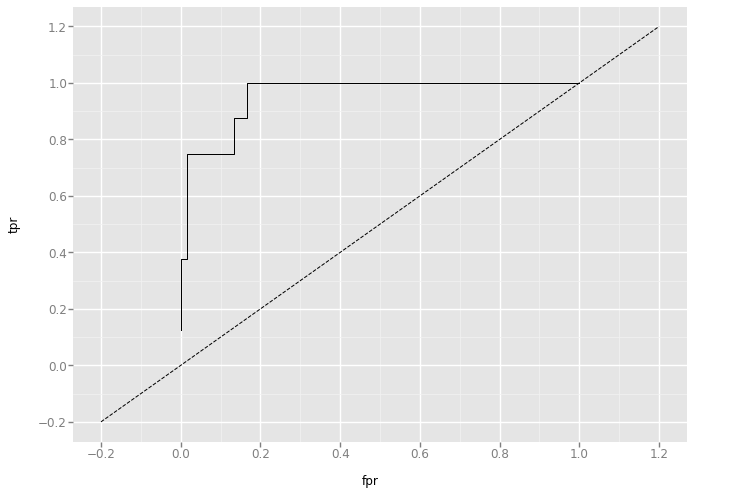

<ggplot: (148209962097)>

In [211]:
from ggplot import *
from sklearn import metrics
predicted1_val = model_q.predict_proba(new_train_data)

fpr, tpr, _ = metrics.roc_curve(xl_train_target, predicted1_val[:,1])

df_c = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
print("the AUC for the given curve is ",metrics.auc(fpr,tpr))
print("The coeffecients of the model are",model_q.coef_)
print("The associated p values are",logit[1])
ggplot(df_c, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')   
    
    


# iv Testing the classifier on the Test Set . Since it was for l = 1, we can use the test set as is i.e without splitting it

In [213]:
#Preparing Test set
xl_test = test
feature_test = pd.DataFrame()
ct = 0
temp_df1 = pd.DataFrame()
xl_test_target = pd.DataFrame()
xl_test_train = pd.DataFrame()

def splitDataFrameIntoSmaller(df, chunkSize): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
        
    return listOfDf



xl_test = xl_test.replace(['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing','walking'],['bending', 'bending', 'notbending', 'notbending', 'notbending', 'notbending','notbending'])


c = splitDataFrameIntoSmaller(xl_test, 480)


for poll in range(0,(len(c)-1)):
    holder2_df = holder2_df[0:0]
    holder2_df.loc[ct,['target']] = c[poll].iloc[0,6] 
    c[poll] = c[poll].drop(columns = 'target')
    holder2_df.loc[ct,['avg_rss12_mean','var_rss12_mean','avg_rss13_mean','var_rss13_mean','avg_rss23_mean','var_rss23_mean']] = list(c[poll].mean())
    holder2_df.loc[ct,['avg_rss12_minimum','var_rss12_minimum','avg_rss13_minimum','var_rss13_minimum','avg_rss23_minimum','var_rss23_minimum']] =list(c[poll].quantile(.25))
    holder2_df.loc[ct,['avg_rss12_maximum','var_rss12_maximum','avg_rss13_maximum','var_rss13_maximum','avg_rss23_maximum','var_rss23_maximum']] =list(c[poll].quantile(.75))
    ct = ct + 1
    feature_test = feature_test.append(holder2_df) 

xl_test_target["target"] = feature_test['target']
feature_test = feature_test.drop(columns = ['target'])
xl_test_data = feature_test
xl_test_target = xl_test_target.replace(['bending','notbending'],[1,0])

new_test_data = pd.DataFrame()
new_test_data = xl_test_data.drop(columns = ['var_rss12_mean','avg_rss13_mean','avg_rss23_mean','var_rss23_mean','var_rss12_minimum','avg_rss13_minimum','var_rss13_minimum','avg_rss23_minimum','var_rss23_minimum','var_rss12_maximum','avg_rss23_maximum'], axis = 1)
predicted_val_test = model_q.predict(new_test_data)
scores= accuracy_score(xl_test_target,predicted_val_test)
print(scores)


1.0


## The difference between the accuracy score is quite significant we obtained a 100 percent accuracy score on our test data as opposed to the 94 percent on the train data. Making a 6 percent increase 

# vi  
## Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters

# Ans. Yes they are very well seperated, which does cause  instability as the stats model fails to converge. 

# vii 

## From the confusion matrices you obtained, do you see imbalanced classes?If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

# Ans, Yes, there were imbalanced classes as seen on the confusion matrix, the error for bending was almost 3/8 i.e three out of 8 times are model predicted worng. 


# imblanaced learn from scikit learn 

# E Binary Classification using L-1 penalized logistic regression

# i

In [82]:
# Instead of using pvalues for variable selection, use L1 regularization. Note that in this problem 
# you have to cross-validate for both l, the number of time series into which you
# break each of your instances, and C, the weight of L1 penalty in your logistic
# regression objective function, Package : Liblinear

def splitDataFrameIntoSmaller(df, chunkSize): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
        
    return listOfDf

bclx = train
bcly = test

bclx = bclx.replace(['bending1', 'bending2','cycling', 'lying', 'sitting', 'standing',
       'walking'],['bending', 'bending', 'notbending', 'notbending', 'notbending', 'notbending',
       'notbending'])

bcly = bcly.replace(['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing',
       'walking'],['bending', 'bending', 'notbending', 'notbending', 'notbending', 'notbending',
       'notbending'])

setofnew  = []
for travel in range(1,11):
    setofold = [] 
    setofold = splitDataFrameIntoSmaller(bclx, (int(480/travel)) )
    onetime = pd.DataFrame()
    rowno = 0
    for alldf in range(0,(len(setofold)-1)):
        holder3_df = holder3_df[0:0]
        holder3_df.loc[rowno,['target']] = setofold[alldf].iloc[0,6] 
        setofold[alldf] = setofold[alldf].drop(columns = ['target'])
        holder3_df.loc[rowno,['avg_rss12_mean','var_rss12_mean','avg_rss13_mean','var_rss13_mean','avg_rss23_mean','var_rss23_mean']] = list(setofold[alldf].mean())
        holder3_df.loc[rowno,['avg_rss12_minimum','var_rss12_minimum','avg_rss13_minimum','var_rss13_minimum','avg_rss23_minimum','var_rss23_minimum']] = list(setofold[alldf].quantile(.25))
        holder3_df.loc[rowno,['avg_rss12_maximum','var_rss12_maximum','avg_rss13_maximum','var_rss13_maximum','avg_rss23_maximum','var_rss23_maximum']] = list(setofold[alldf].quantile(.75))
        rowno = rowno + 1
        onetime = onetime.append(holder3_df) 
    setofnew.append(onetime)

    




In [52]:
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle



mean_score1 = []
cs_score = []
kf = KFold(n_splits=5)
X_trains = pd.DataFrame()
X_tests =  pd.DataFrame()
X_trains_target = pd.DataFrame()
X_trains_data = pd.DataFrame()
X_tests_target = pd.DataFrame()
X_tests_data = pd.DataFrame()

for vals in setofnew:
    valuess = shuffle(vals)
    valuess = valuess.dropna() 
    gs =[]
    cs =  []
    kf.get_n_splits(valuess)
    for train_index, test_index in kf.split(valuess):
        X_trains = valuess.iloc[train_index]
        X_tests =  valuess.iloc[test_index]
        X_trains_target = X_trains['target']
        X_trains = X_trains.drop(columns = 'target')
        X_trains_data = X_trains
        X_tests_target = X_tests['target']
        X_tests = X_tests.drop(columns = 'target')
        X_tests_data = X_tests
        model_e = LogisticRegressionCV(penalty = 'l1', Cs=10, solver = 'liblinear' )
        model_e.fit(X_trains_data,X_trains_target)
        scoring = accuracy_score(X_tests_target,model_e.predict(X_tests_data))
        cs = model_e.coef_
        gs.append(scoring)
    mean_score.append(np.mean(gs))
    cs_score.append(cs)
print(mean_score)

[0.9417582417582417, 0.9261904761904762, 0.9314634146341463, 0.922962962962963, 0.9382352941176471, 0.9241493526046372, 0.9251073883161511, 0.9283384301732924, 0.9269603986362445, 0.9352941176470588, 0.9120879120879122, 0.9116402116402117, 0.9168292682926829, 0.9302356902356903, 0.9264705882352942, 0.9337850045167118, 0.9458977663230239, 0.9375297315664287, 0.9269472856018883, 0.9338235294117647]


In [53]:
print(cs_score)

[array([[ 1.06865075, -1.74909322,  2.0359109 ,  0.        ,  6.09949536,
         0.        , -3.63278291,  2.54749489,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -2.6310602 ,
         0.        ,  0.        ,  0.        ]]), array([[ 0.        ,  0.03983587,  0.13763891,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.05785841, -0.20052477,
         0.        ,  0.        ,  0.        ]]), array([[ 0.00638015, -0.01389031,  0.28091013,  0.        ,  0.        ,
         1.53025244,  0.7206795 ,  0.47848722, -1.41752007,  0.        ,
        -1.16216142,  0.        ,  0.        , -0.24900499, -0.07523311,
         3.37957421,  0.        ,  0.        ]]), array([[ 4.30105171e-02, -7.57132360e-01,  9.66115451e-01,
        -1.71215087e+00, -6.20941251e+00,  1.72683503e+01,
         9.18087415e-01,  1.17209758e+00, -2.23048528e+00,
         3.1568

## From the above it was found that L = 1 the best mean of accuracy was found and after L1 selection we will choose features bases on C values
## . Values to be selected 1,2,3,5,7,8,14. and dropping 4,6,9,10,11,12,13,15,16,17,18

In [88]:
holder_cv = pd.DataFrame()
holder_cv = setofnew[0]
holder_cv = holder_cv.dropna()
holder_cv = holder_cv.replace(['bending','notbending'],[1,0])
# Training the model usind the obtained features. 
new_trains_data = pd.DataFrame()
new_trains_data = holder_cv.drop(columns = ['var_rss12_mean','avg_rss13_mean','var_rss13_mean','avg_rss23_mean','var_rss23_mean','var_rss12_minimum','var_rss13_minimum','avg_rss23_minimum','var_rss23_minimum','var_rss13_maximum','var_rss23_maximum'])
model_e.fit(new_trains_data,holder_cv['target'])
predicted_vals = model_e.predict(new_trains_data)
scores= accuracy_score(holder_cv['target'],predicted_vals)
print(scores)

1.0


# Best Value for this model was =  L1 regulization used for parameeter selection  and the accuracy was 100 %

# ii

## Ans. L1 penalized model perfomrs better than p-value based selection. It gives 100 % accuracy as compared to 94% accuracy obtained from P value selection. L-1 was comparatively easier to implment as the feature selection happens automatically by the model. The coefficients of non significant features was brought down to zero and the rest were chosen for modelling in the next iteration.

# F.

## i. Multi Class Classification

# The best L was 1

In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn import linear_model

Xf = xl_train_data
Yf = xl_train_target
train_samples = 67


Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(Xf, Yf, train_size=train_samples, test_size=1)

scaler = StandardScaler()
Xf_train = scaler.fit_transform(Xf_train)
Xf_test = scaler.transform(Xf_test)
Xf_entire = scaler.transform(Xf)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,multi_class='multinomial',penalty='l1', solver='saga', tol=0.1)
clf.fit(Xf_train, Yf_train)

#parsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(Xf_test, Yf_test)
#print('Best C % .4f' % clf.C_)
#print("Sparsity with L1 penalty: %.2f%%" % sparsity)
#print("Test score with L1 penalty on a small train subset: %.4f" % score)

#lets train again to be sure and run on entire train again
score = clf.score(Xf_entire,Yf)
print("Test score with L1 penalty on a entire train set: %.4f" % score)
print("Test error with L1 penalty for entire train set: %.4f" % (1-score))

Test score with L1 penalty on a entire train set: 0.9706
Test error with L1 penalty for entire train set: 0.0294


C:\Users\anmol\newpython\envs\ulti\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Confusion Matrix , AUC and ROC

[[60  0]
 [ 2  6]]


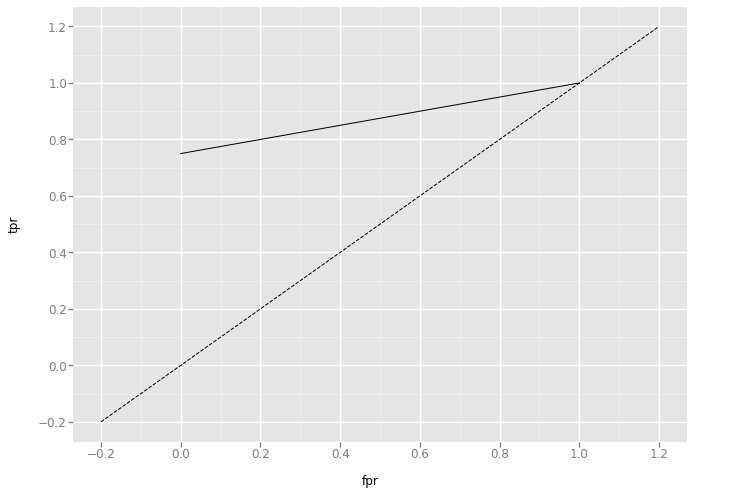

<ggplot: (148206597489)>

In [216]:
from sklearn.metrics import confusion_matrix

predicted_val = clf.predict(Xf_entire)
cm = confusion_matrix(xl_train_target,predicted_val)
print(cm)


t_pred = clf.predict(Xf_entire)

fpr, tpr, _ = metrics.roc_curve(Yf,t_pred)

df_g = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df_g, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')
    

# ii  Na¨ıve Bayes’ classiﬁer

Test score with L1 penalty on a entire train set: 0.3382
Test error with L1 penalty for entire train set: 0.6618


C:\Users\anmol\newpython\envs\ulti\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


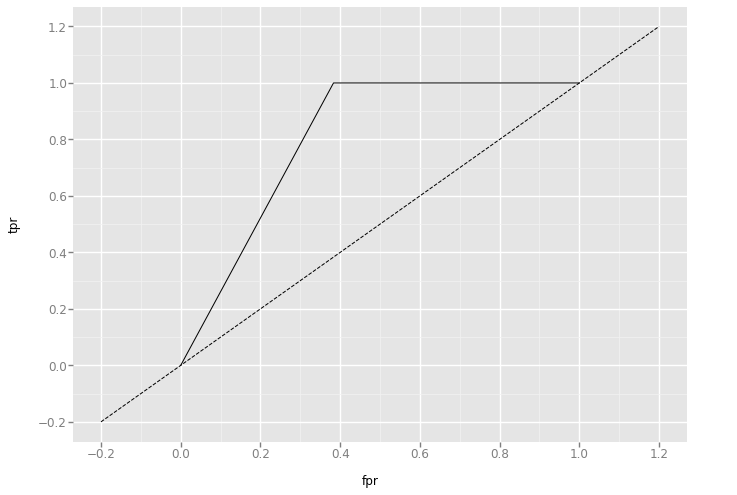

<ggplot: (106461354546)>

In [211]:
# Using Gaussian
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

gnb = GaussianNB()
y_pred = gnb.fit(Xf,Yf).predict(Xf)
score = mean_squared_error(Yf, y_pred) 
print("Test score with L1 penalty on a entire train set: %.4f" % score)
print("Test error with L1 penalty for entire train set: %.4f" % (1-score))


fpr, tpr, _ = metrics.roc_curve(Yf,y_pred)

df_g = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df_g, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [214]:
# Uisng Multinomial
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()
y_pred = mnb.fit(Xf,Yf).predict(Xf)
score = mean_squared_error(Yf, y_pred) 
print("Test score with L1 penalty on a entire train set: %.4f" % score)
print("Test error with L1 penalty for entire train set: %.4f" % (1-score))

y_pred1 = mnb.fit(Xf,Yf).predict_proba(Xf)

fpr, tpr, _ = metrics.roc_curve(Yf,y_pred1)

df_g = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df_g, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

NameError: name 'Xf' is not defined

# iii

## Ans: Gausian model was better than Multinomial Naive Baye's classifier. It can been clearly seen from the significant differnce in the test accuracy

# ISLR

#  2 ISLR 3.7.4

QUESTION : 

(b) Answer (a) using test rather than training RSS.
(c) Suppose that the true relationship between X and Y is not linear,
but we don’t know how far it is from linear. Consider the training
RSS for the linear regression, and also the training RSS for the
cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not
enough information to tell? Justify your answer.
(d) Answer (c) using test rather than training RSS.

ANSWER:

4. (a) I would expect the polynomial regression to have a lower training RSS
than the linear regression because it could make a tighter fit against data that
matched with a wider irreducible error (Var(epsilon)).

(b) Converse to (a), I would expect the polynomial regression to have a higher
test RSS as the overfit from training would have more error than the linear
regression.

(c) Polynomial regression has lower train RSS than the linear fit because of
higher flexibility: no matter what the underlying true relationshop is the
more flexible model will closer follow points and reduce train RSS.
An example of this beahvior is shown on Figure~2.9 from Chapter 2.

(d) There is not enough information to tell which test RSS would be lower
for either regression given the problem statement is defined as not knowing
"how far it is from linear". If it is closer to linear than cubic, the linear
regression test RSS could be lower than the cubic regression test RSS.
Or, if it is closer to cubic than linear, the cubic regression test RSS
could be lower than the linear regression test RSS. It is dues to
bias-variance tradeoff: it is not clear what level of flexibility will
fit data better.

# 3 ISLR 4.7.3

QUESTION :

3. This problem relates to the QDA model, in which the observations

within each class are drawn from a normal distribution with a class-
specific mean vector and a class specific covariance matrix. We con-
sider the simple case where p = 1; i.e. there is only one feature.

Suppose that we have K classes, and that if an observation belongs

to the kth class then X comes from a one-dimensional normal dis-
tribution, X ∼ N(μk, σ2

k). Recall that the density function for the
one-dimensional normal distribution is given in (4.11). Prove that in
this case, the Bayes’ classifier is not linear. Argue that it is in fact
quadratic.
Hint: For this problem, you should follow the arguments laid out in
Section 4.4.2, but without making the assumption that σ2
1 = ... = σ2
K.

ANSWER :

p k (x)=π k 12π  √ σ exp(−12σ 2  (x−μ k ) 2 )∑π l 12π  √ σ exp(−12σ 2  (x−μ l ) 2 ) p yes (x)=π yes exp(−12σ 2  (x−μ yes ) 2 )∑π l exp(−12σ 2  (x−μ l ) 2 ) =π yes exp(−12σ 2  (x−μ yes ) 2 )π yes exp(−12σ 2  (x−μ yes ) 2 )+π no exp(−12σ 2  (x−μ no ) 2 ) =0.80exp(−12∗36 (x−10) 2 )0.80exp(−12∗36 (x−10) 2 )+0.20exp(−12∗36 x 2 ) p yes (4)=0.80exp(−12∗36 (4−10) 2 )0.80exp(−12∗36 (4−10) 2 )+0.20exp(−12∗36 4 2 ) =75.2%

# 4 ISLR 4.7.7

QUESTION:


7. Suppose that we wish to predict whether a given stock will issue a
dividend this year (“Yes” or “No”) based on X, last year’s percent
profit. We examine a large number of companies and discover that the
mean value of X for companies that issued a dividend was X ̄ = 10,
while the mean for those that didn’t was X ̄ = 0. In addition, the
variance of X for these two sets of companies was ˆσ2 = 36. Finally,

80 % of companies issued dividends. Assuming that X follows a nor-
mal distribution, predict the probability that a company will issue

a dividend this year given that its percentage profit was X = 4 last
year.
Hint: Recall that the density function for a normal random variable
is f(x) = √
1
2πσ2 e−(x−μ)2/2σ2

. You will need to use Bayes’ theorem.

ANSWER:

p k (x)=π k 12π  √ σ k  exp(−12σ 2 k  (x−μ k ) 2 )∑π l 12π  √ σ l  exp(−12σ 2 l  (x−μ l ) 2 ) log(p k (x))=log(π k )+log(12π  √ σ k  )+−12σ 2 k  (x−μ k ) 2 log(∑π l 12π  √ σ l  exp(−12σ 2 l  (x−μ l ) 2 )) log(p k (x))log(∑π l 12π − −  √ σ l  exp(−12σ 2 l  (x−μ l ) 2 ))=log(π k )+log(12π − −  √ σ k  )+−12σ 2 k  (x−μ k ) 2 δ(x)=log(π k )+log(12π − −  √ σ k  )+−12σ 2 k  (x−μ k ) 2  
pk(x)=πk12πσkexp⁡(−12σk2(x−μk)2)∑πl12πσlexp⁡(−12σl2(x−μl)2)log⁡(pk(x))=log⁡(πk)+log⁡(12πσk)+−12σk2(x−μk)2log⁡(∑πl12πσlexp⁡(−12σl2(x−μl)2))log⁡(pk(x))log⁡(∑πl12πσlexp⁡(−12σl2(x−μl)2))=log⁡(πk)+log⁡(12πσk)+−12σk2(x−μk)2δ(x)=log⁡(πk)+log⁡(12πσk)+−12σk2(x−μk)2


As you can see, δ(x) 
δ(x)
 is a quadratic function of x 
x

In [ ]:
#binary classification as bending(bending 1 + bending 2) and not bending
train_target= pd.DataFrame()
number = 0
test_target= pd.DataFrame()
number1 = 0
train_target["target"]= []
test_target["target"] = []

blr_train = pd.DataFrame()
blr_train["first"] = train_df['avg_rss12_minimum']
blr_train["second"] = train_df['avg_rss12_maximum']
blr_train["third"] = train_df['avg_rss12_mean']
blr_train["first1"] = train_df['var_rss12_minimum']
blr_train["second1"] = train_df['var_rss12_maximum']
blr_train["third1"] = train_df['var_rss12_mean']
blr_train["first2"] = train_df['var_rss23_minimum']
blr_train["second2"] = train_df['var_rss23_maximum']
blr_train["third2"] = train_df['var_rss23_mean']
blr_train["bending_or_not"] = train_df['target']
blr_train = blr_train.dropna(axis = 0)

#randomize the train data
blr_train = blr_train.sample(frac = 1)
blr_train = blr_train.reset_index(drop = True)

blr_train_target = blr_train['bending_or_not']
blr_train = blr_train.drop(['bending_or_not'],axis = 1)


for i in blr_train_target:
    if i == "bending1" or i == "bending2":
                train_target.loc[number,['target']] = 1
                number = number +1
    else:
        train_target.loc[number,['target']] = 0
        number = number + 1

        

blr_test = pd.DataFrame()
blr_test["first"] = test_df['avg_rss12_minimum']
blr_test["second"] = test_df['avg_rss12_maximum']
blr_test["third"] = test_df['avg_rss12_mean']
blr_test["first1"] = test_df['var_rss12_minimum']
blr_test["second1"] = test_df['var_rss12_maximum']
blr_test["third1"] = test_df['var_rss12_mean']
blr_test["first2"] = test_df['var_rss23_minimum']
blr_test["second2"] = test_df['var_rss23_maximum']
blr_test["third2"] = test_df['var_rss23_mean']
blr_test["bending_or_not"] = test_df['target']
blr_test = blr_test.dropna(axis = 0)

#randomize the test data
blr_test = blr_test.sample(frac = 1)
blr_test = blr_test.reset_index(drop = True)


blr_test_target = blr_test['bending_or_not']
blr_test = blr_test.drop(['bending_or_not'],axis = 1)

for j in blr_test_target:
    if j == "bending1" or j == "bending2":
                test_target.loc[number1,['target']] = 1
                number1 = number1 +1
    else:
        test_target.loc[number1,['target']] = 0
        number1 = number1 + 1

      

    
# creating a base model to later check if our logistic regression model is good or bad
# The function says that every row is bending.
def base_rate_model(blr_test):
    temp_target = np.ones(blr_test.shape[0])
    return temp_target

base_rate_target = base_rate_model(blr_test)

from sklearn.metrics import accuracy_score
print("Base rate accuracy is %2.2f" % accuracy_score(test_target,base_rate_target))
   

#Lets try to beat that score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'l2', C=1)
model.fit(blr_train,train_target)

print("Logistic regression accuracy is %2.2f" % accuracy_score(test_target,model.predict(blr_test)))

answer = model.predict(blr_test)

#Lets try plotting it 
import matplotlib.pyplot as plt
import pylab

#plt.scatter(blr_test['first'],blr_test['second'],blr_test['third'])
#for q in answer:
  #  if answer[q] == 1:
 #       plt.scatter(answer[q], marker = 'o',c ='b')
#    else:
#        plt.scatter(answer[q] ,marker = 'x',c = 'r')
    
#xlabel('First Paramaeter')
#ylabel('Second Parameter')
#legend(['Not Bending', 'Bending'])
#show()
